Toyota Etios cargado correctamente. (272,008 filas, 47 columnas)
Ford Figo cargado correctamente. (167,559 filas, 47 columnas)
Isuzu FTR850 cargado correctamente. (749,039 filas, 48 columnas)

===== TOYOTA ETIOS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272008 entries, 0 to 272007
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               272008 non-null  object 
 1   trip               272008 non-null  int64  
 2   driver             272008 non-null  int64  
 3   route              272008 non-null  int64  
 4   load               272008 non-null  int64  
 5   coldStart          272008 non-null  bool   
 6   gps_lat            272008 non-null  float64
 7   gps_lon            272008 non-null  float64
 8   gps_alt            272008 non-null  float64
 9   gps_speed          272008 non-null  float64
 10  humidity           272008 non-null  float64
 11  pressure           272008 non

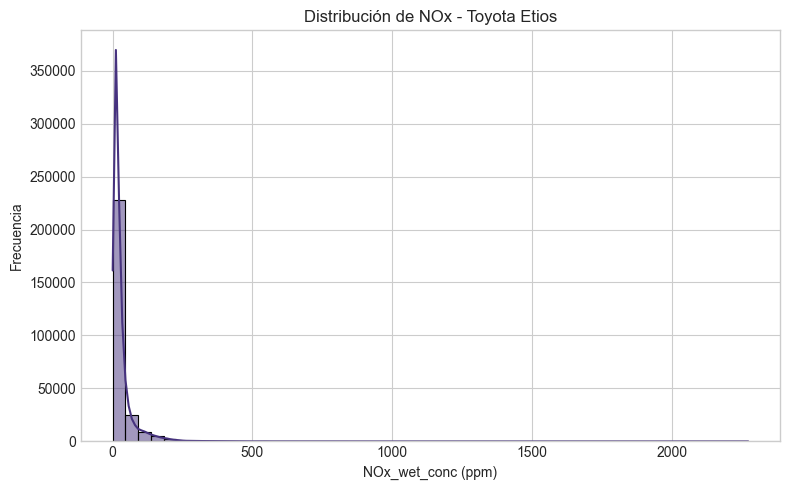

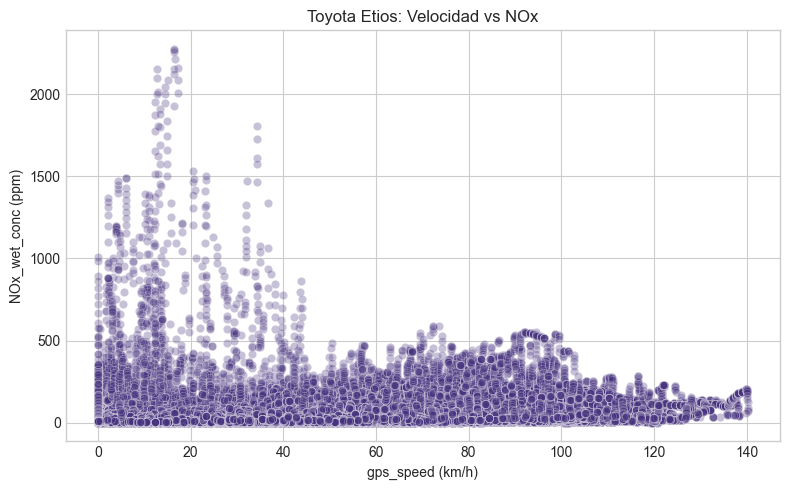

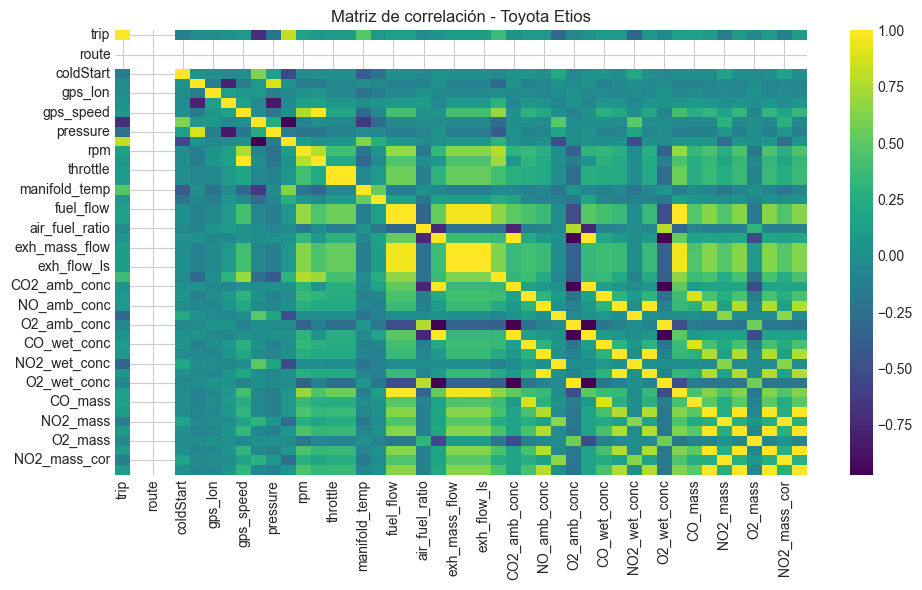


 Generando gráficos para: Ford Figo


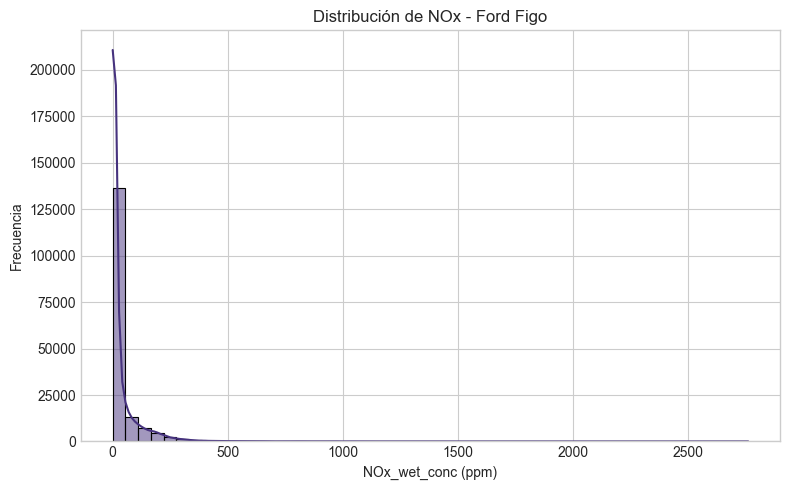

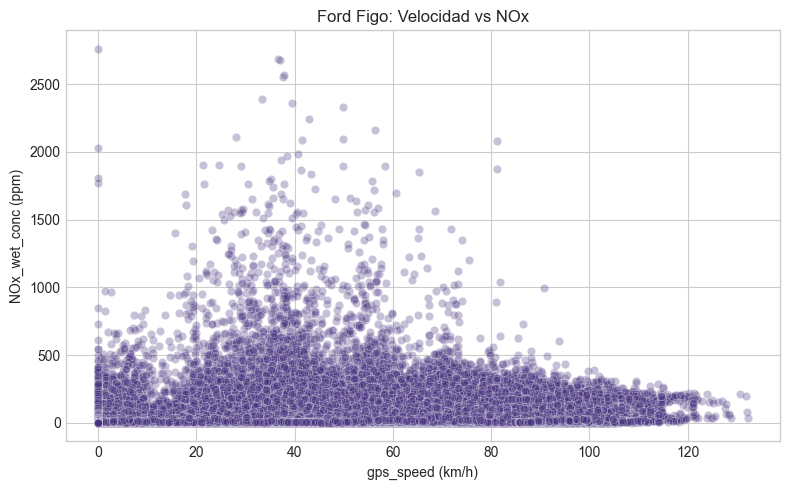

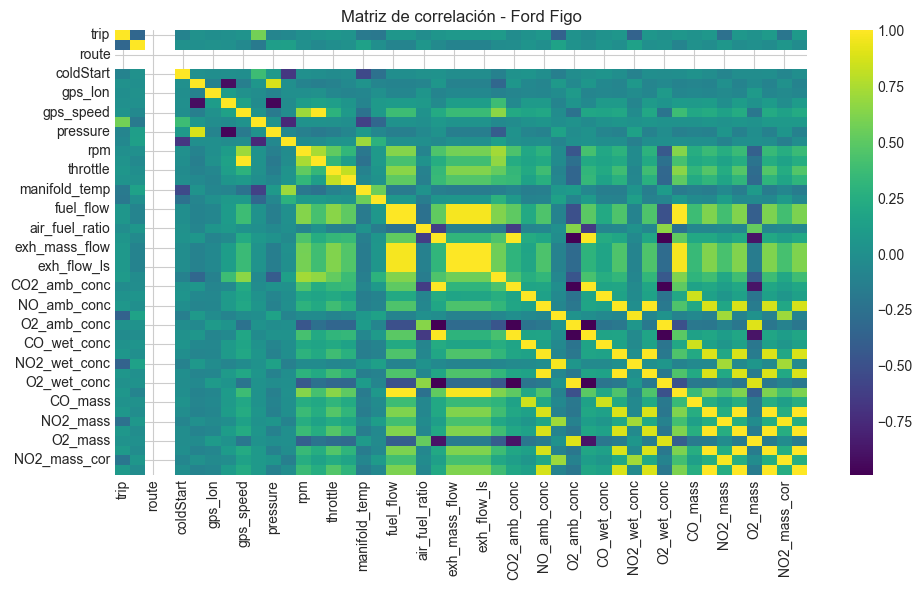


 Generando gráficos para: Isuzu FTR850


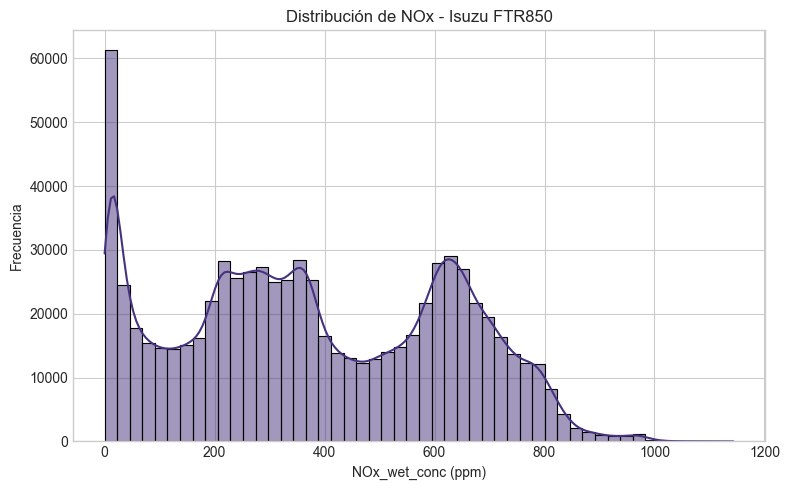

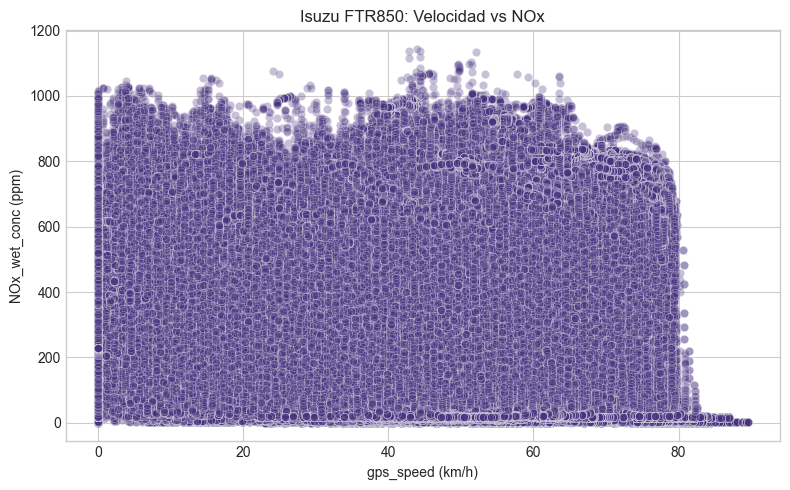

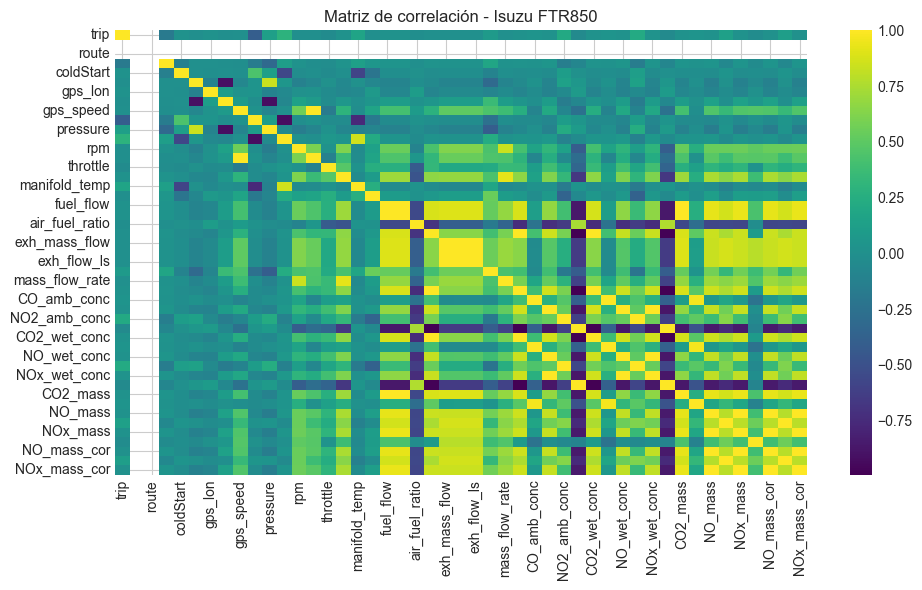

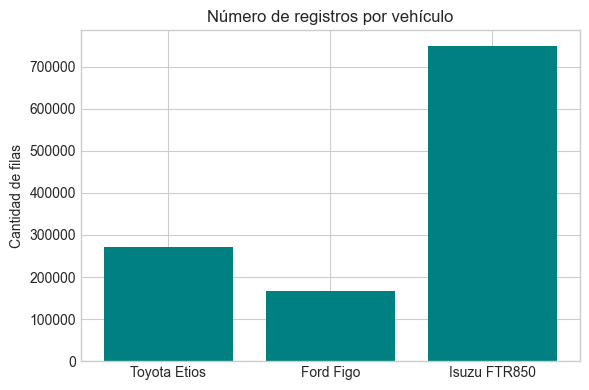


 Visualización inicial completa para todos los archivos RDE.


In [3]:
# ======================================================
# VISUALIZACIÓN INICIAL DEL DATASET RDE (Pretoria)
# Autor: Sergio Andrés Zapata Gómez
# Ingeniería Mecánica - Deep Learning
# ======================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# ======================================================
# 1. Cargar los tres archivos del dataset
# ======================================================
# Rutas de los archivos CSV
files = {
    "Toyota Etios": "public-etios.csv",
    "Ford Figo": "public-figo.csv",
    "Isuzu FTR850": "public-rrv.csv"
}

datasets = {}
for name, path in files.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        datasets[name] = df
        print(f"{name} cargado correctamente. ({df.shape[0]:,} filas, {df.shape[1]} columnas)")
    else:
        print(f" No se encontró el archivo: {path}")

# ======================================================
# 2. Exploración general
# ======================================================
for name, df in datasets.items():
    print(f"\n===== {name.upper()} =====")
    print(df.info())
    print("\nPrimeras filas:")
    print(df.head(3))
    print("\nEstadísticas:")
    print(df.describe().T.head(10))

# ======================================================
# 3. Visualizaciones básicas
# ======================================================
for name, df in datasets.items():
    print(f"\n Generando gráficos para: {name}")

    # Buscar variables relevantes automáticamente
    col_nox = next((c for c in df.columns if "nox" in c.lower()), None)
    col_speed = next((c for c in df.columns if "speed" in c.lower()), None)
    col_rpm = next((c for c in df.columns if "rpm" in c.lower()), None)

    # --- Histograma de NOx ---
    if col_nox:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col_nox], bins=50, kde=True)
        plt.title(f"Distribución de NOx - {name}")
        plt.xlabel(f"{col_nox} (ppm)")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

    # --- Velocidad vs NOx ---
    if col_nox and col_speed:
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=df, x=col_speed, y=col_nox, alpha=0.3)
        plt.title(f"{name}: Velocidad vs NOx")
        plt.xlabel(f"{col_speed} (km/h)")
        plt.ylabel(f"{col_nox} (ppm)")
        plt.tight_layout()
        plt.show()

    # --- Matriz de correlación (numérica) ---
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=False)
    plt.title(f"Matriz de correlación - {name}")
    plt.tight_layout()
    plt.show()

# ======================================================
# 4. Comparación general entre vehículos
# ======================================================
sizes = {name: df.shape[0] for name, df in datasets.items()}
plt.figure(figsize=(6,4))
plt.bar(sizes.keys(), sizes.values(), color='teal')
plt.title("Número de registros por vehículo")
plt.ylabel("Cantidad de filas")
plt.tight_layout()
plt.show()

print("\n Visualización inicial completa para todos los archivos RDE.")
